
**Machine Learning project**



**Table of contents**


1.   Objective
2.   Libraries
3.   Data Load
4.   Exploratory Data Analysis
5.   Target definition
6.   Preprocessing
7.   Interim Conclusions
8.   Features Management
9.   Clasification Models
  *   Logistic Regresion
  *   Decision Tree
  *   Random Forest
  *   Support Vector Machine
  *   Light GBM
10. Best model Adjustment
11. Conclusions

**Objective**

Telecom operator Interconnect would like to be able to predict its customer cancellation rate. If a user or user is discovered to be planning to leave, they will be offered promotional codes and special plan options. The Interconnect marketing team has collected some of the personal data of its customers, including information about their plans and contracts.


**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score
)




**Data Load**

In [ ]:
PathC = 'https://raw.githubusercontent.com/JALVAxfow/Proyecto-Final/main/contract.csv'
PathP = 'https://raw.githubusercontent.com/JALVAxfow/Proyecto-Final/main/personal.csv'
PathI = 'https://raw.githubusercontent.com/JALVAxfow/Proyecto-Final/main/internet.csv'
PathPh = 'https://raw.githubusercontent.com/JALVAxfow/Proyecto-Final/main/phone.csv'

In [ ]:
contract = pd.read_csv(PathC)
personal = pd.read_csv(PathP)
internet = pd.read_csv(PathI)
phone = pd.read_csv(PathPh)


Exploratory Data Analysis

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In the contract data set we can find what will be our goal, as it includes the date of commencement and conclusion of contracts and indicates the customers who still retain their service.

We can review the distribution of the contract type.

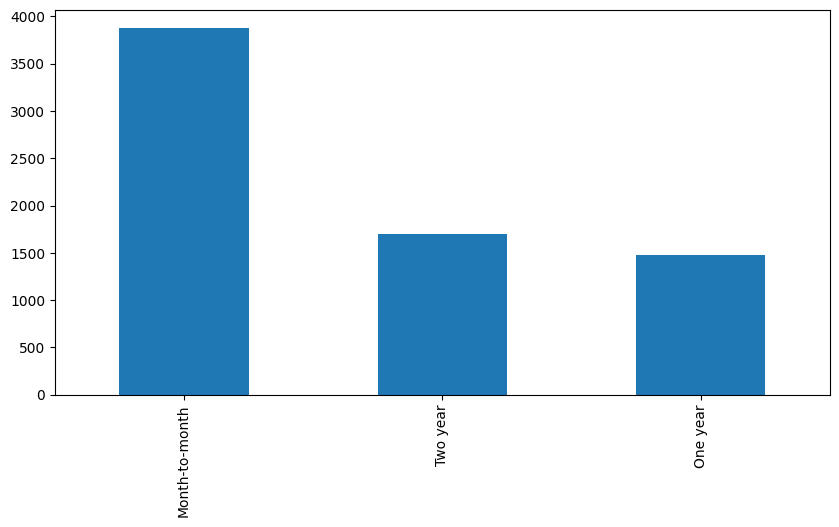

In [ ]:
contract['Type'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

We see that most customers opt for monthly payment plans, and two- and one-year plans are less than half as compared to monthly ones.

In [ ]:
contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

We found an average monthly payment of 64.76 and an average of 70 in what is a normal distribution.

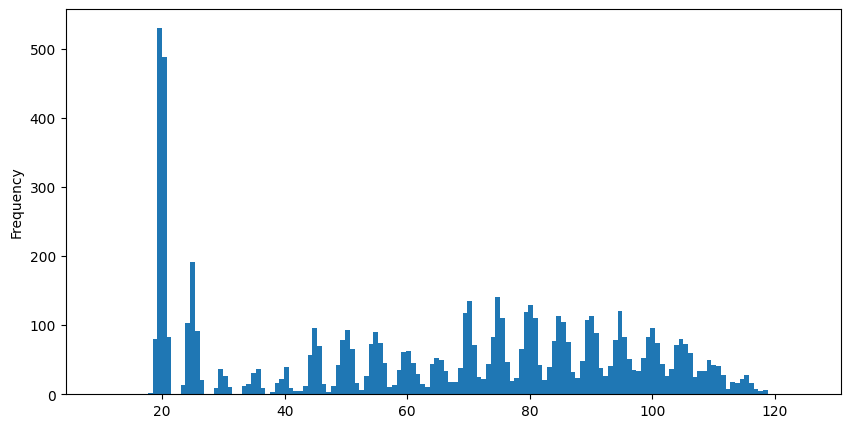

In [ ]:
contract['MonthlyCharges'].sort_values().plot(kind="hist", bins=150, range=(10,125),  figsize=(10,5))
plt.show()

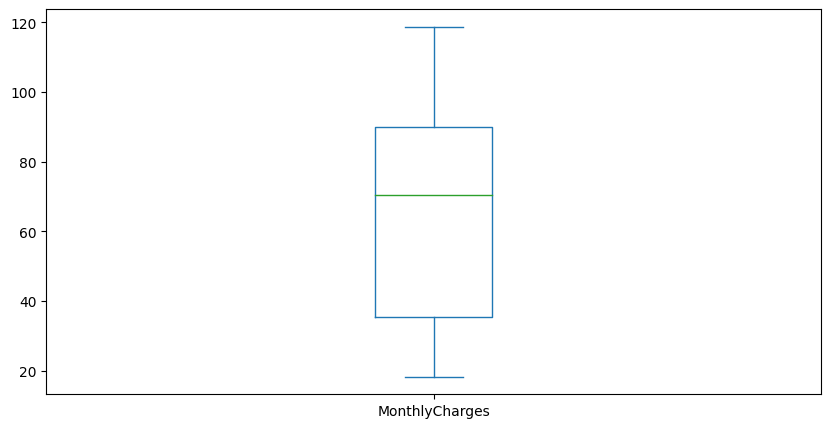

In [ ]:
contract['MonthlyCharges'].sort_values().plot(kind="box", figsize=(10,5))
plt.show()

We can see that most monthly payments are around 20 and we do not find atypical amounts.

In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In personal data we find the same number of rows as in contracts

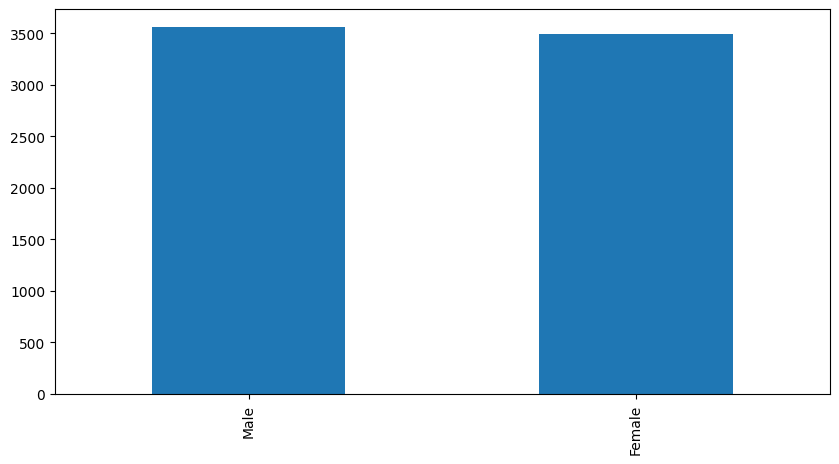

In [ ]:
personal['gender'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

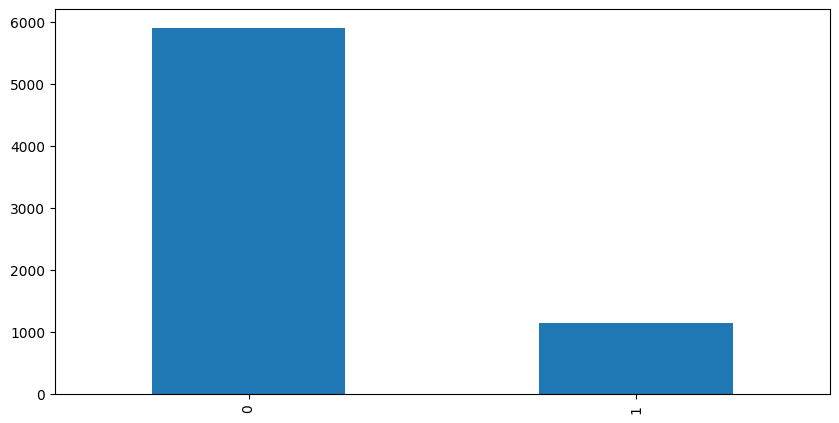

In [ ]:
personal['SeniorCitizen'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

We see that as far as gender is concerned it is almost half, and as regards users who are older adults these account for a seventh of the total.

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


As for the Internet, we find fewer queues, as there are customers who do not have internet services contracted.

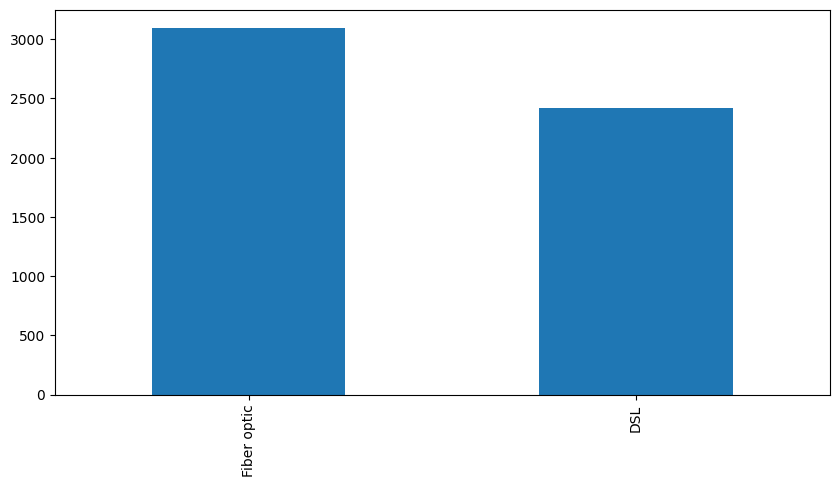

In [ ]:
internet['InternetService'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

In [ ]:
internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

As for the type of internet service we see that the fiber optic has a slight advantage over DSL

In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In the same case, we see fewer queues in telephone services for users who only have Internet access.

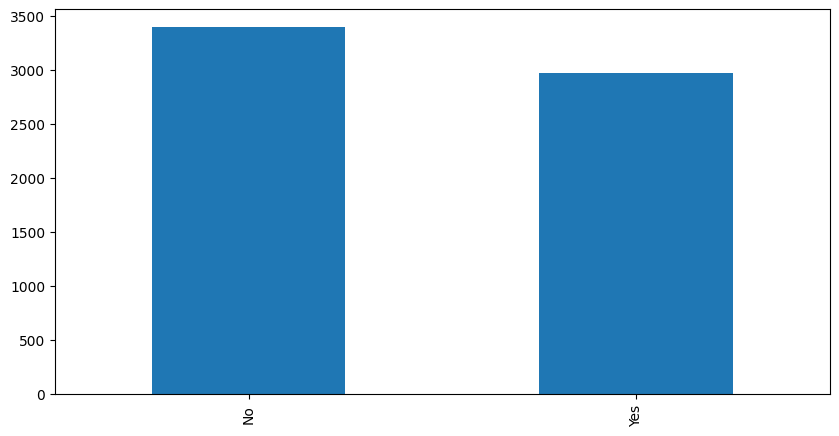

In [ ]:
phone['MultipleLines'].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

In [ ]:
phone['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

Finally, we see that there is a slight advantage among those who only have one line over those who hire multiple lines.

**Target Definition**

Our target as mentioned above is the result of whether a user has already canceled their account or continues with the company, so we will add a column that tells us which users no longer have an active account.

In [ ]:
contract["target"] = (~(contract["EndDate"] == "No" )).astype("int8")

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
contract["target"].mean()

0.2653698707936959

In [ ]:
contract.shape

(7043, 9)

We can bear in mind that there is a class imbalance as in our target we find that it is a quarter of the users of the sample who have canceled their contracts

**Preprocessing**

Already with a defined target we can add the other datasets to generate one that allows us to use templates.

In [ ]:
model_dataset = (
    contract
    .merge (personal, on="customerID", how="left")
    .merge (phone, on="customerID", how="left" )
    .merge(internet, on="customerID", how="left")
)

In [ ]:
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   target            7043 non-null   int8   
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     6361 non-null   object 
 14  InternetService   5517 non-null   object 
 15  OnlineSecurity    5517 non-null   object 
 16  OnlineBackup      5517 non-null   object 


In [ ]:
md = model_dataset

In [ ]:
md.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,1,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,0,Female,...,No,No,NaN,DSL,Yes,No,No,No,No,No
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,Male,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No


Due to the difference in the number of rows we find missing data that will have to be filled in.

In [ ]:
md.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
target                 0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

We can find that the columns with missing data simply do not have these services contracted so we will fill the NaNs with the String "No"

In [ ]:
md["MultipleLines"] = md.MultipleLines.fillna("No")
md["InternetService"] = md.InternetService.fillna("No")
md["OnlineSecurity"] = md.OnlineSecurity.fillna("No")
md["OnlineBackup"] = md.OnlineBackup.fillna("No")
md["DeviceProtection"] = md.DeviceProtection.fillna("No")
md["TechSupport"] = md.TechSupport.fillna("No")
md["StreamingTV"] = md.StreamingTV.fillna("No")
md["StreamingMovies"] = md.StreamingMovies.fillna("No")

In [ ]:
md.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
target              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
md.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,1,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,0,Female,...,No,No,No,DSL,Yes,No,No,No,No,No
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,Male,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No


Now we have a clean dataset with which we can work the models after solving the following questions:


What is the best way to work with our categorical variables?


Will it be necessary to work with the variables that indicate dates?


Will it be necessary to add more features?


How many models will it be wise to work with?

**Interim Conclusions**

First we determine that we face a problem of classification between whether or not the customer has cancelled their service. We find in our data set a majority of categorical data, so starting from this and knowing that many models work better or only with numerical variables, it is best to use the One Hot Encoding method and this also answers the question of whether we have to add more features in a partial way since more features will be added with the OHE, but as to what to do with the date variables I think to generate a new feature to replace those two dates and would do a rest of the start date to the cancellation date generating a variable that gives us the number of days that has lasted each contract. Once I'm done with this preprocessing work, I'll focus on determining how many classification models to use.

**Tratamiento de Características**

I'll start by giving datetime format to the date columns.

In [ ]:
md['BeginDate'] = pd.to_datetime(md['BeginDate'])

For the EndDate column we find that the value of the rows containing a "No" must be replaced by the deadline on which the data was taken which is February 1st 2020.

In [ ]:
md['EndDate'] = pd.to_datetime(md['EndDate'], errors='coerce')
md['EndDate'] = md['EndDate'].fillna(pd.to_datetime('2020-02-01 00:00:00'))

In [ ]:
md.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,Yes,No,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


We already have the two dates in datetime type, and now we will create a new column with the total days hired.

In [ ]:
md["DaysContracted"] = (md['EndDate'] - md['BeginDate']).dt.days
md["DaysContracted"]

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: DaysContracted, Length: 7043, dtype: int64

We created a new numeric variable that I hope will be of help to the models, the purpose of this is to replace the dates columns in the final dataframe.

Before applying OHE to the data set, we have to remove the variables that would not bring us any benefit to our model, this would be the customer ID and the dates.



In [ ]:
cols_drop = ['customerID', 'EndDate', 'BeginDate']
md = md.drop(cols_drop, axis=1)
md.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DaysContracted
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No,31
1,One year,No,Mailed check,56.95,1889.5,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,61


In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   object 
 5   target            7043 non-null   int8   
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [ ]:
md["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

After reviewing the column types we found that Total Charges has 11 null values as a double-space empty string, so we will replace them with a 0 to convert column to numeric.

In [ ]:
md["TotalCharges"] = md["TotalCharges"].replace(' ', 0)

In [ ]:
md["TotalCharges"] = md.TotalCharges.astype("float64")

In [ ]:
md_OHE = pd.get_dummies(md, drop_first=True)
md_OHE.head()

,MonthlyCharges,TotalCharges,target,SeniorCitizen,DaysContracted,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,29.85,29.85,0,0,31,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,56.95,1889.50,0,0,1036,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,53.85,108.15,1,0,61,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,42.30,1840.75,0,0,1371,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,70.70,151.65,1,0,61,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
md_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   float64
 2   target                                 7043 non-null   int8   
 3   SeniorCitizen                          7043 non-null   int64  
 4   DaysContracted                         7043 non-null   int64  
 5   Type_One year                          7043 non-null   uint8  
 6   Type_Two year                          7043 non-null   uint8  
 7   PaperlessBilling_Yes                   7043 non-null   uint8  
 8   PaymentMethod_Credit card (automatic)  7043 non-null   uint8  
 9   PaymentMethod_Electronic check         7043 non-null   uint8  
 10  PaymentMethod_Mailed check             7043 non-null   uint8  
 11  gend

Finally, I see that the most convenient thing would be to scale the numerical variables after dividing them into training, validation and test sets; for this we will have to define our characteristics and the objective first.

In [ ]:
target = md_OHE['target']
features = md_OHE.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [ ]:
numeric = ['MonthlyCharges', 'TotalCharges', 'DaysContracted']

scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

X_train.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,DaysContracted,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2142,-0.000474,-0.419925,0,-0.464150,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1623,1.074754,1.256017,0,0.886385,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,1,1
6074,-1.376499,-1.000283,0,-1.286039,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1362,0.177346,-0.905497,0,-1.160940,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6754,-0.098524,-1.010646,0,-1.326394,0,1,1,0,0,0,...,1,1,0,0,1,1,0,1,0,0


Our sets are ready to start using models.

**Clasification Models**

Given that our problem is classification we have different models alternatives, we will try 5 different: Logistic Regression, Decision Tree, Random Forest, Vector Support Machine and LightGBM.

We define an evaluation process for our models.

In [ ]:
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    print(df_eval_stats)

    return

With this function we will be able to evaluate the models, we will take Logistic Regression as the starting point.

In [ ]:
random_state = 200


**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=random_state, max_iter=100)
lr.fit(X_train, y_train)

LogisticRegression(random_state=200)

In [ ]:
lr_preds = lr.predict(X_test)

          train  test
Accuracy   0.80  0.82
F1         0.59  0.64
APS        0.66  0.68
ROC AUC    0.84  0.86


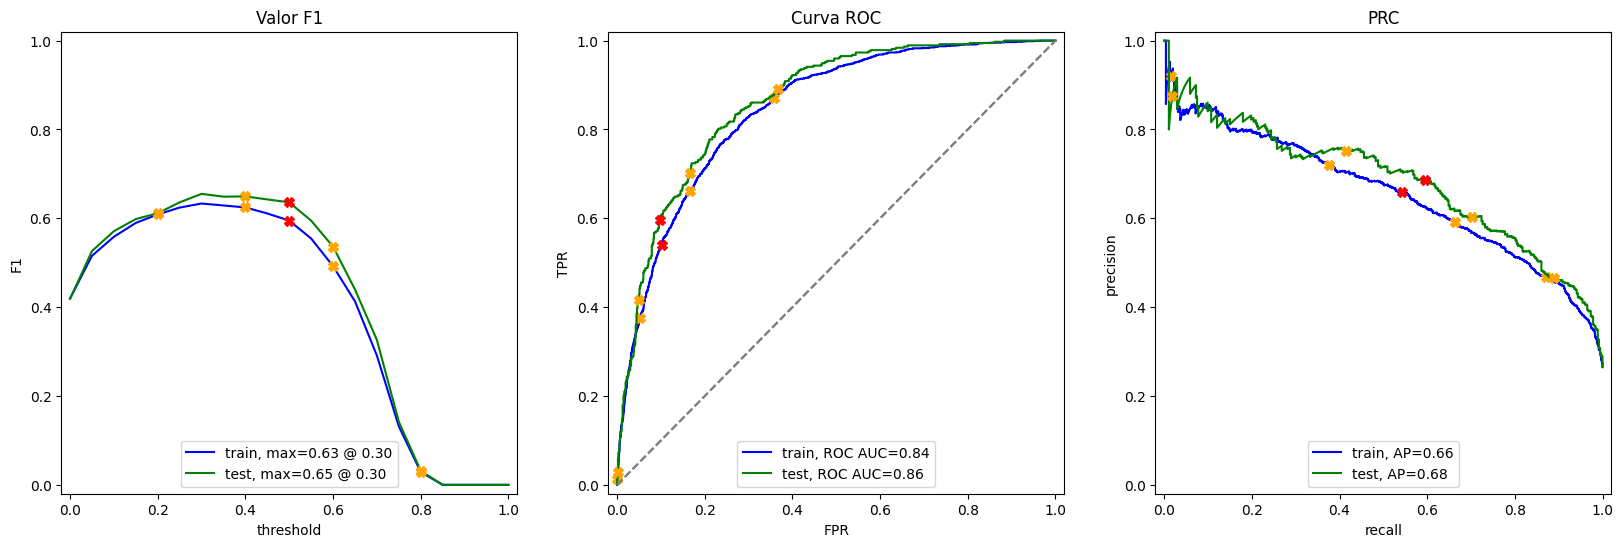

In [ ]:
evaluate_model(lr, X_train, y_train, X_test, y_test)

**Decision Tree**

For this model it is best to search for the best parameters with an estimator and a Random Search.

In [ ]:
dt_estimator = DecisionTreeClassifier(random_state=random_state)

In [ ]:
cv_random_state = 100

dt_parameter_space = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

dt_rscv = RandomizedSearchCV(dt_estimator, dt_parameter_space, random_state=cv_random_state, n_iter=5, n_jobs=-1)
dt_rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=200), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b0ba050>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b0b9fc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b0babf0>},
                   random_state=100)

In [ ]:
dt_rscv.best_params_

{'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 16}

In [ ]:
dt_model = DecisionTreeClassifier(max_depth= 6, max_features= None, min_samples_leaf= 3, min_samples_split= 16)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=16)

In [ ]:
dt_preds = dt_model.predict(X_test)

          train  test
Accuracy   0.82  0.83
F1         0.57  0.60
APS        0.72  0.74
ROC AUC    0.87  0.87


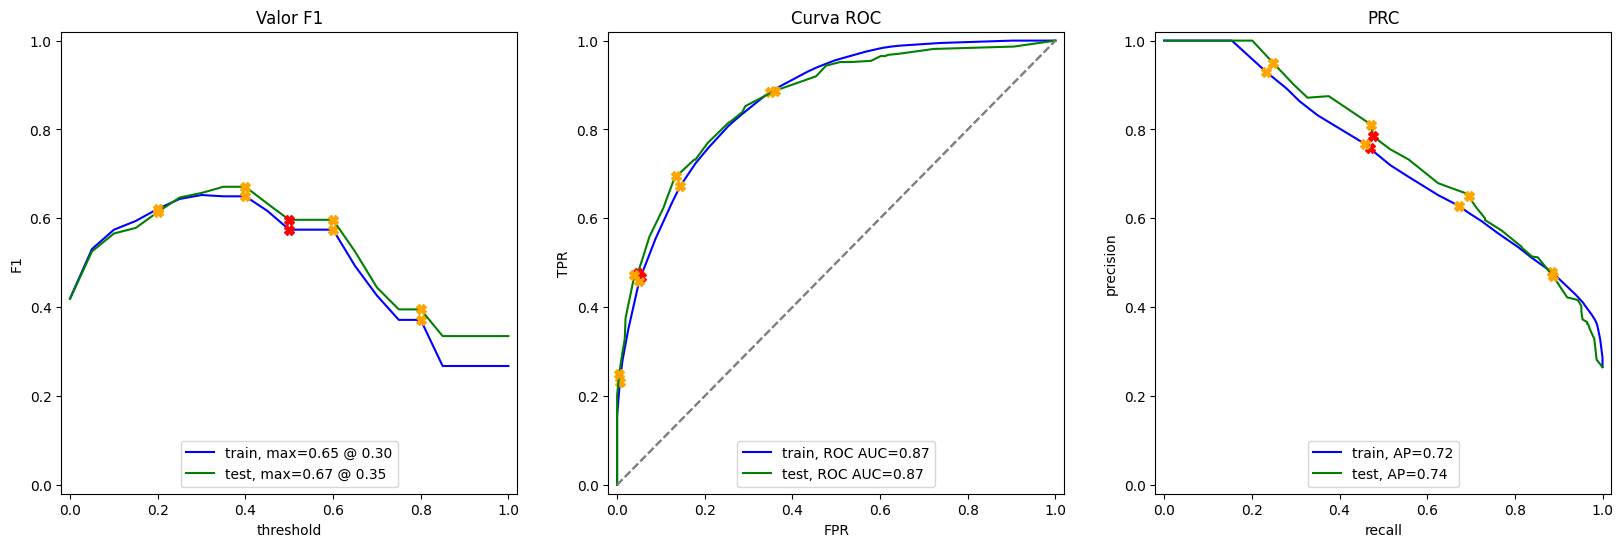

In [ ]:
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

Although the F1 value of our test set improved compared to the training set, it is still considered a low value.

**Random Forest**

Like the previous model it will be better to look for the appropriate parameters first and it is appropriate to do so through a Randomized Search.

In [ ]:
rf_estimator = RandomForestClassifier(random_state=random_state)

In [ ]:
cv_random_state = 100

rf_parameter_space = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'n_estimators': randint(100, 1000)
}

rf_rscv = RandomizedSearchCV(rf_estimator, rf_parameter_space, random_state=cv_random_state, n_iter=5, n_jobs=-1)
rf_rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=200), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434aea4940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434acf14e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434acf2dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434acf2ef0>},
                   random_state=100)

In [ ]:
rf_rscv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 450}

In [ ]:
rf_model = RandomForestClassifier(n_estimators=450, max_depth=8, min_samples_leaf= 1, min_samples_split= 12, random_state=random_state)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=12, n_estimators=450,
                       random_state=200)

In [ ]:
rf_preds = rf_model.predict(X_test)

          train  test
Accuracy   0.84  0.83
F1         0.64  0.61
APS        0.78  0.76
ROC AUC    0.90  0.88


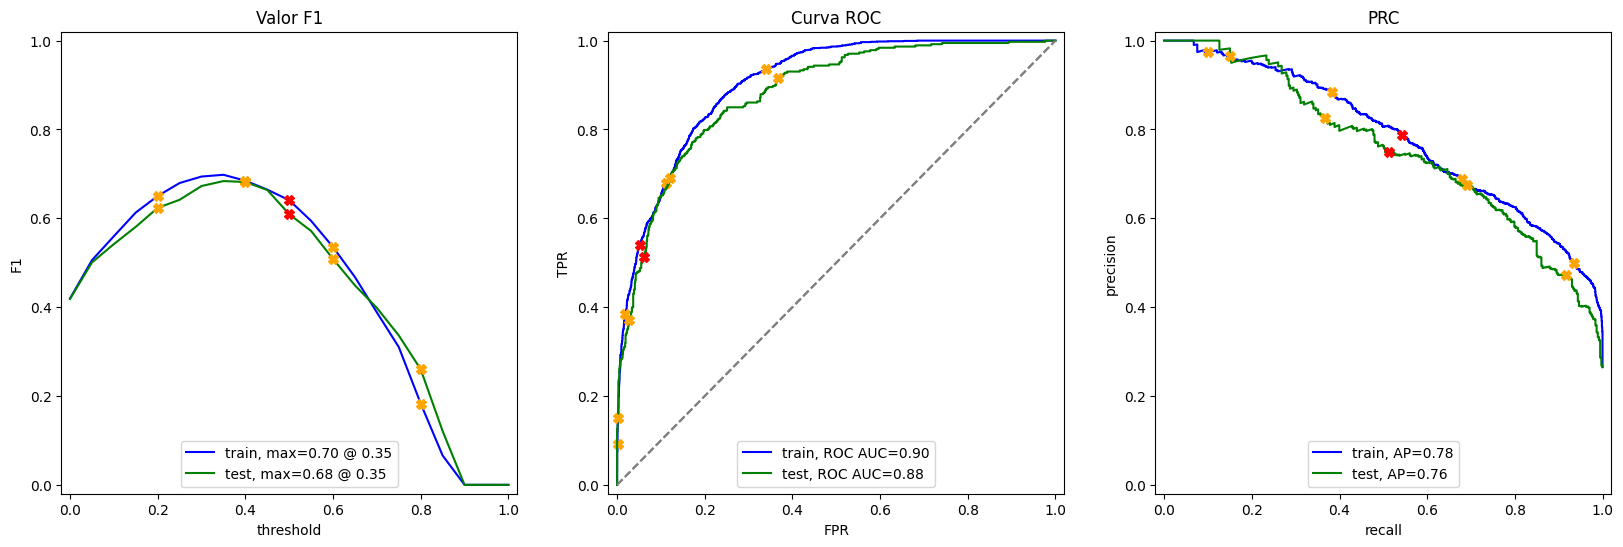

In [ ]:
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Even with the adjusted parameters our test set dropped 3 points from the F1 compared to the training set.

**Vector support machine**

Let's try first without adjusting hyperparameters.

In [ ]:
svc_model_sa = SVC(probability=True)

In [ ]:
svc_model_sa.fit(X_train, y_train)

SVC(probability=True)

          train  test
Accuracy   0.81  0.81
F1         0.59  0.59
APS        0.70  0.65
ROC AUC    0.86  0.81


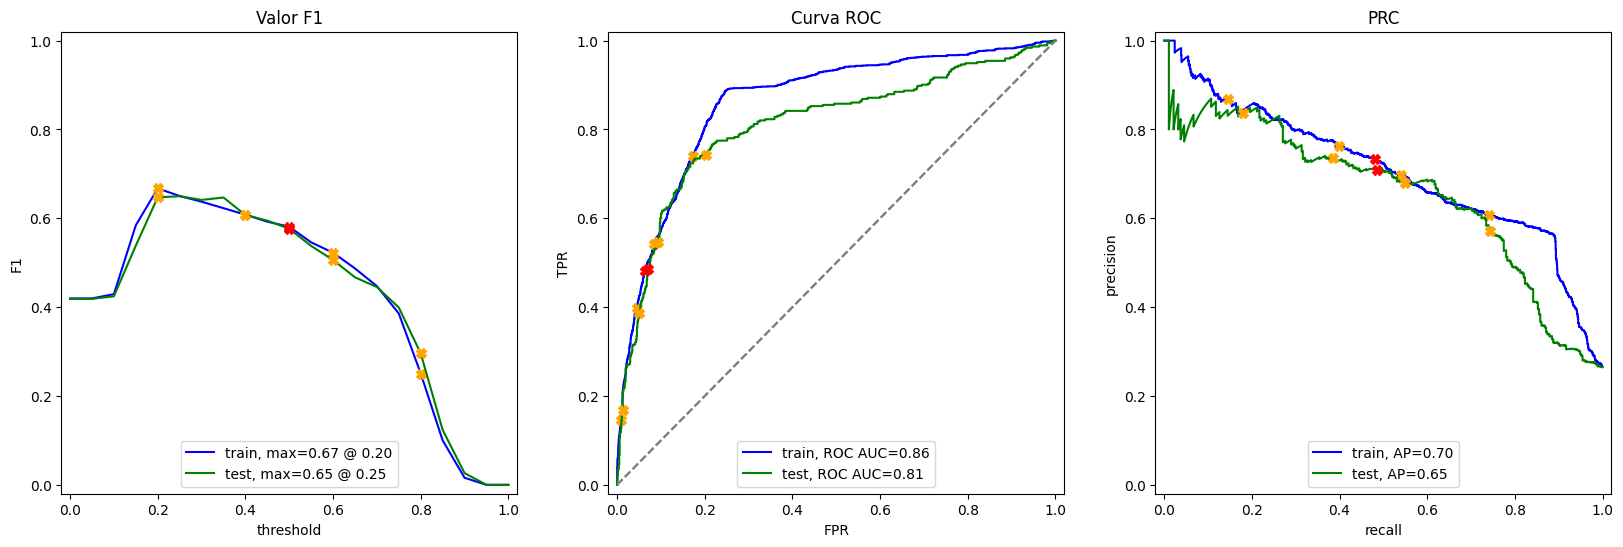

In [ ]:
evaluate_model(svc_model_sa, X_train, y_train, X_test, y_test)

We found a low F1 value but no variations between training and test, let's see if it improves with hyperparameter adjustment.

In [ ]:
svc_estimator = SVC()

In [ ]:
cv_random_state = 100

svc_parameter_space = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(uniform(0.001, 0.1).rvs(5)),
    'class_weight': [None, 'balanced'],
    'tol': [0.001, 0.0001, 0.00001],
    'max_iter': [1000, 2000, 3000]
}

svc_rscv = RandomizedSearchCV(svc_estimator, svc_parameter_space, random_state=cv_random_state, n_iter=5, n_jobs=-1)
svc_rscv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RandomizedSearchCV(estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f434aeccac0>,
                                        'class_weight': [None, 'balanced'],
                                        'gamma': ['scale', 'auto',
                                                  0.04882154000263903,
                                                  0.058318126771512206,
                                                  0.02492298314447469,
                                                  0.01386012177097018,
                                                  0.09354539581199119],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'max_iter': [1000, 2000, 3000],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   random_state=100)

In [ ]:
svc_rscv.best_params_

{'C': 1.3156912078311422,
 'class_weight': None,
 'gamma': 0.04882154000263903,
 'kernel': 'rbf',
 'max_iter': 3000,
 'tol': 0.0001}

In [ ]:
svc_model = SVC (
  probability= True,
  C= 1.3156912078311422,
  class_weight= None,
  gamma= 0.09778749762097032,
  kernel= 'rbf',
  max_iter= 3000,
  tol= 0.0001
)

In [ ]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1.3156912078311422, gamma=0.09778749762097032, max_iter=3000,
    probability=True, tol=0.0001)

          train  test
Accuracy   0.81  0.81
F1         0.58  0.59
APS        0.69  0.66
ROC AUC    0.85  0.81


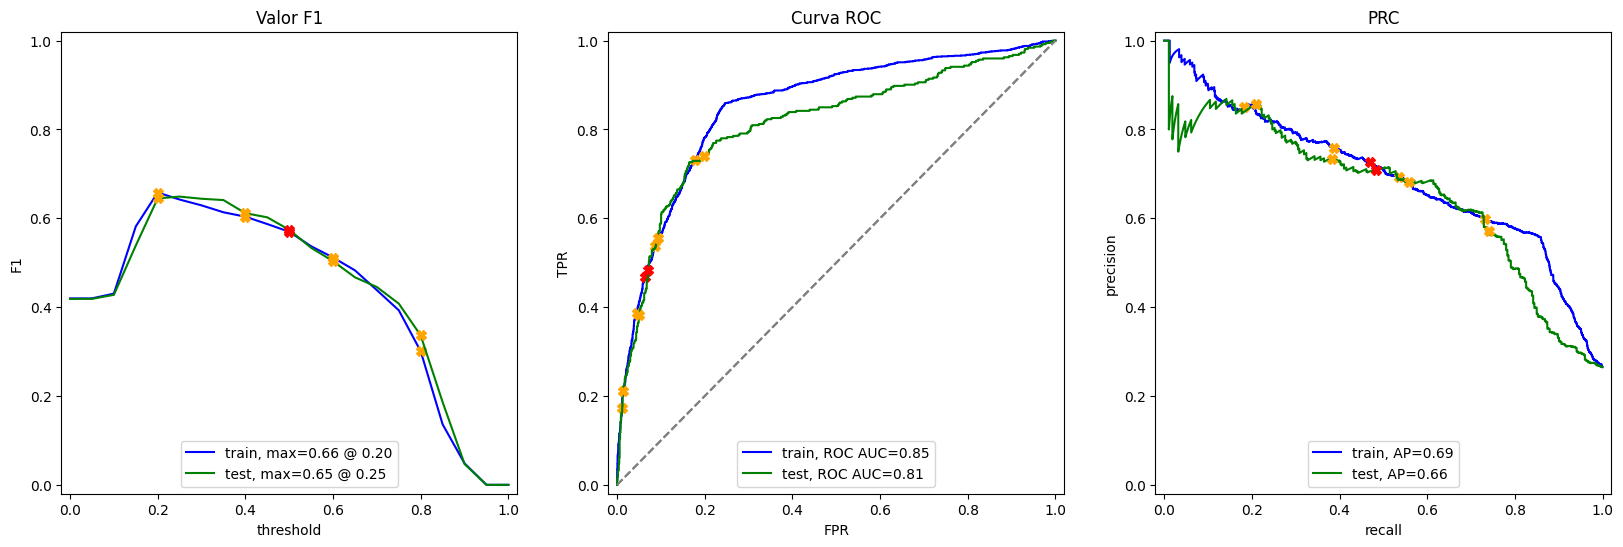

In [ ]:
evaluate_model(svc_model, X_train, y_train, X_test, y_test)

We didn't really find a difference after adjusting hyperparameters.

**Light GBM**

I'll do the test without hyperparameter adjustment first.

In [ ]:
lgbm_model_sa = LGBMClassifier (learning_rate= 0.1)

In [ ]:
lgbm_model_sa.fit(X_train, y_train)

LGBMClassifier()

          train  test
Accuracy   0.92  0.88
F1         0.83  0.75
APS        0.94  0.86
ROC AUC    0.98  0.93


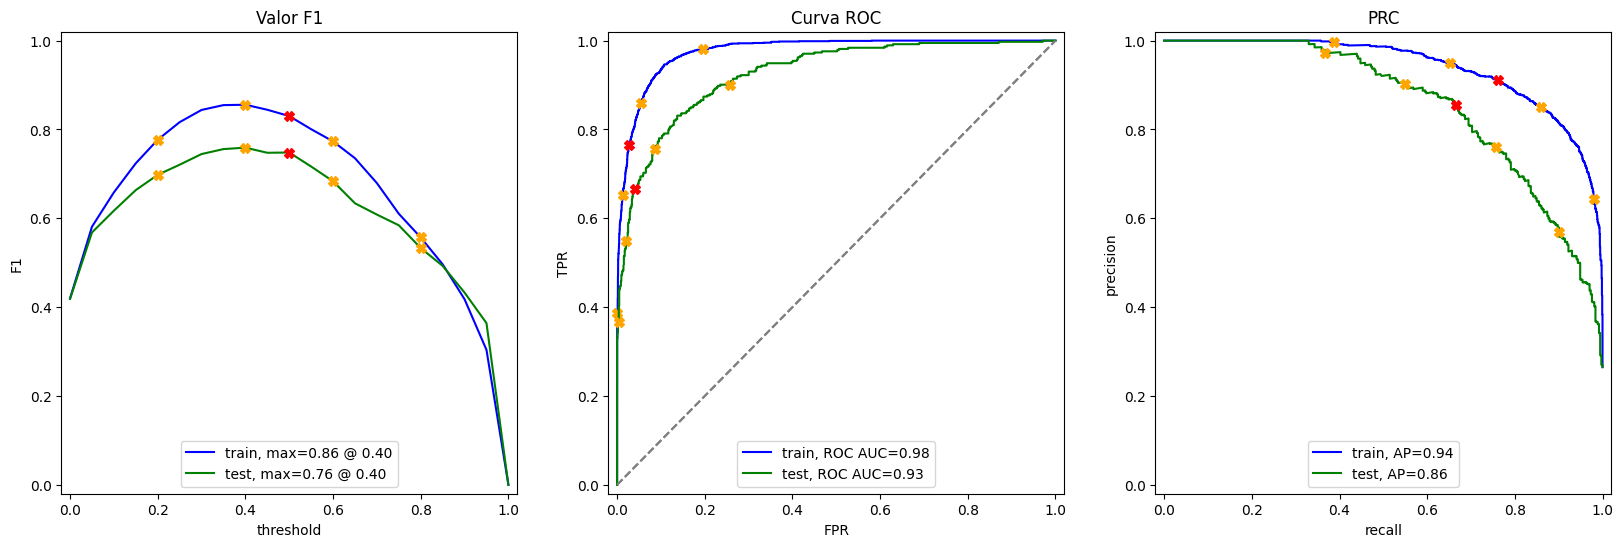

In [ ]:
evaluate_model(lgbm_model_sa, X_train, y_train, X_test, y_test)

We found a good F1 value, let's see if it is possible to improve it with hyperparameter adjustment.

In [ ]:
lgbm_estimator = LGBMClassifier(random_state=random_state)

In [ ]:
cv_random_state = 100

lgbm_parameter_space = {
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': randint(10, 100),
    'max_depth': randint(3, 10),
    'min_child_samples': randint(5, 20),
    'min_split_gain': uniform(0, 0.1),
    'bagging_fraction': uniform(0.6, 0.4)
}

lgbm_rscv = RandomizedSearchCV(lgbm_estimator, lgbm_parameter_space, random_state=cv_random_state, n_iter=5, n_jobs=-1)
lgbm_rscv.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8682996338907114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8682996338907114


RandomizedSearchCV(estimator=LGBMClassifier(random_state=200), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bagging_fraction': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f434b34c2b0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f434b01ebf0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b34f610>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b34eb60>,
                                        'min_split_gain': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f434b34cd00>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f434b34f220>},
                   random_state=100)

In [ ]:
lgbm_rscv.best_params_

{'bagging_fraction': 0.8682996338907114,
 'learning_rate': 0.09258527551050476,
 'max_depth': 4,
 'min_child_samples': 5,
 'min_split_gain': 0.057509332942725006,
 'num_leaves': 70}

In [ ]:
lgbm_model = LGBMClassifier (
  bagging_fraction= 0.8682996338907114,
  learning_rate= 0.09258527551050476,
  max_depth= 4,
  min_child_samples= 5,
  min_split_gain= 0.057509332942725006,
  num_leaves= 70
)

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.8682996338907114,
               learning_rate=0.09258527551050476, max_depth=4,
               min_child_samples=5, min_split_gain=0.057509332942725006,
               num_leaves=70)

In [ ]:
lgbm_preds = lgbm_model.predict(X_test)

          train  test
Accuracy   0.86  0.86
F1         0.70  0.70
APS        0.83  0.83
ROC AUC    0.92  0.91


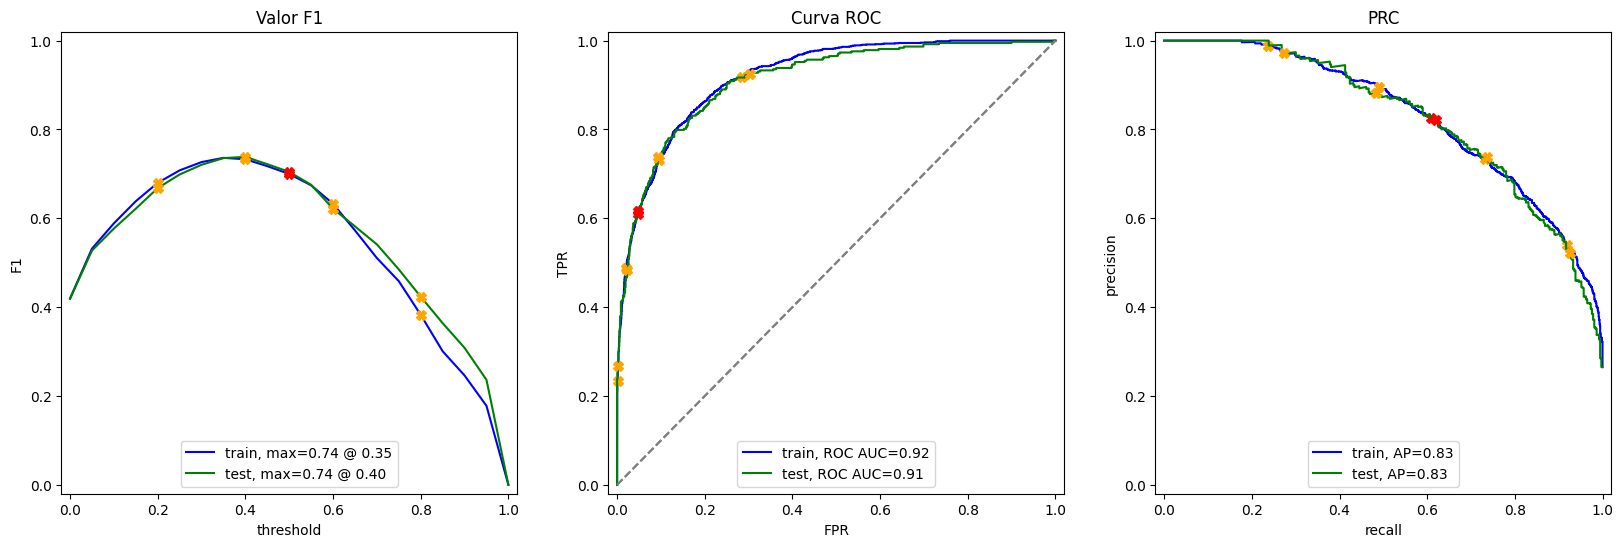

In [ ]:
evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

We see that there was not exactly an improvement but that all our metrics were lowered.

**Best Model Adjustment**

But since we have used LightGBM it would be good to use its method to review our features, as it might be that some are not important at all and are affecting the performance of our models.

In [ ]:
importance = lgbm_model.feature_importances_

In [ ]:
feature_names = X_train.columns


In [ ]:
indices = np.argsort(importance)[::-1]
sorted_features = feature_names[indices]

In [ ]:
for feature, importance_score in zip(sorted_features, importance[indices]):
    print(feature, importance_score)

DaysContracted 451
MonthlyCharges 257
TotalCharges 126
InternetService_Fiber optic 40
PaymentMethod_Electronic check 35
Type_Two year 32
PaperlessBilling_Yes 29
StreamingMovies_Yes 23
OnlineSecurity_Yes 21
TechSupport_Yes 21
MultipleLines_Yes 20
InternetService_No 20
Type_One year 17
SeniorCitizen 17
StreamingTV_Yes 13
gender_Male 13
Partner_Yes 12
Dependents_Yes 11
OnlineBackup_Yes 10
PaymentMethod_Credit card (automatic) 9
PaymentMethod_Mailed check 7
DeviceProtection_Yes 0


We see that there are at least 3 of our features that do not have much to do with our goal, I could get rid of these features and try the LightGBM model again.

In [ ]:
cols_drop = ["DeviceProtection_Yes", "PaymentMethod_Mailed check", "PaymentMethod_Credit card (automatic)" ]

In [ ]:
X_train= X_train.drop(columns=cols_drop)

In [ ]:
X_test= X_test.drop(columns=cols_drop)

In [ ]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8682996338907114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8682996338907114


LGBMClassifier(bagging_fraction=0.8682996338907114,
               learning_rate=0.09258527551050476, max_depth=4,
               min_child_samples=5, min_split_gain=0.057509332942725006,
               num_leaves=70)

          train  test
Accuracy   0.86  0.87
F1         0.70  0.71
APS        0.83  0.83
ROC AUC    0.92  0.91


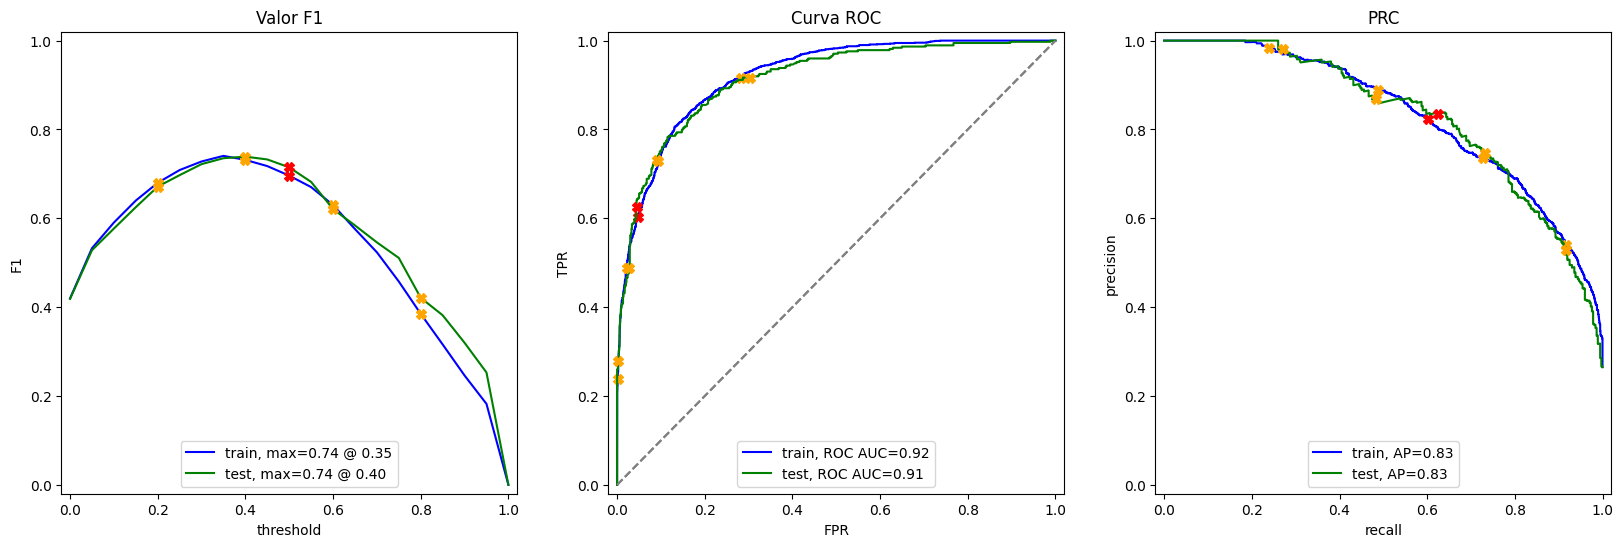

In [ ]:
evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

There was a slight improvement and we could place a better search for hyperparameters in a gridsearch with a smaller number of them.


In [ ]:
lgbm_estimator = LGBMClassifier()

In [ ]:
cv_random_state = 100

lgbm_parameter_space = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(lgbm_estimator, lgbm_parameter_space, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [ ]:
lgbm_model = LGBMClassifier (
  learning_rate= 0.1,
  max_depth= 5,
  n_estimators= 300
)

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=300)

In [ ]:
lgbm_preds = lgbm_model.predict(X_test)

          train  test
Accuracy   0.93  0.89
F1         0.87  0.77
APS        0.96  0.87
ROC AUC    0.98  0.93


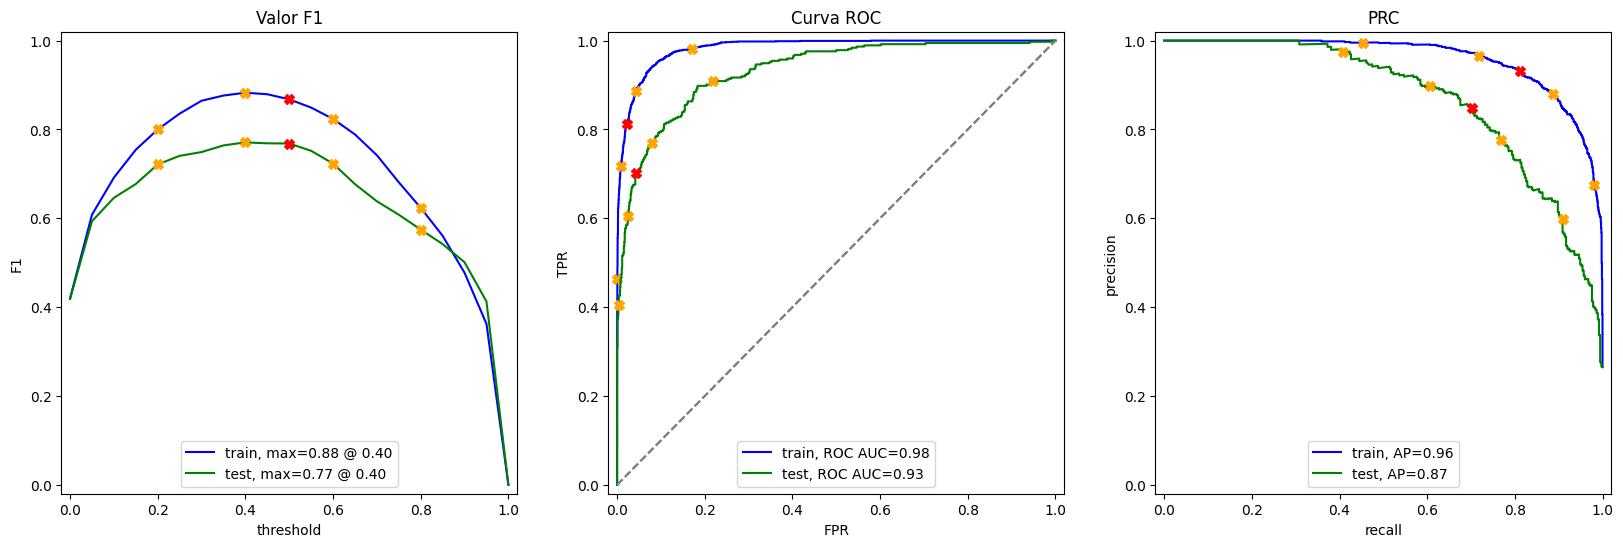

In [ ]:
evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)

We found that this would be our best model, despite losing quite a few points on metrics as we move from training to test.

**Conclusions**


-- The goal of the Interconnect company is to find out if some of its customers consider cancelling their contracts to offer them promotions that allow them to retain them.
With the personal data obtained from their databases, 4 in total, we were able to find various features with which we could work and generate an objective which consisted in selecting which customers have already canceled their service, within the data provided customers with cancellation correspond to 26%.


-- From the definition of the objective a first analysis of features was made to determine which did not represent a predictive value for our models by removing in the first instance the features that had to do with the customer's id and the dates on which the contracts had been given off and off in case of cancellation, not without first generating a new feature based on the time passed between one and another date and taking as the limit for the non-cancelled, the date on which data was taken 1 February 2020.


-- It was subsequently concluded that most characteristics were categorical, so they were treated with One Hot Encoding and scaled for numerical characteristics.


-- Worked with 5 models in a first iteration and subsequently selected Light GBM to continue working for having had the best metrics.


-- With Light GBM one of its methods was used to find out the importance of the characteristics and the 3 less related to the target were eliminated, in addition to this a new hyperparameter search was carried out with Gridsearch which led us to the best metrics values that we obtained with the different models.

**Solution Report**

**The implemented steps were:**


* Datasets compilation
* Exploratory Data Analysis
* Definition and creation of Objective Feature
* Merge Datasets
* Unified Dataset Preprocessing
* Treatment of Categoric and Numeric Characteristics
* Implementation and evaluation of models
* Selection of the model with better metrics
* Best model adjustment
* Conclusions of the project


**Key difficulties and steps**


-- There was no objective feature with which to work directly the models, so it had to be generated from a feature that indicated to us with a date the existence or absence of this new categorical feature (The customer had or had not canceled his service).


-- Subsequently I had to Merge 4 different Datasets that included the features to be used, however there were different amounts of data so that a preprocessing had to be given to change the missing values that were generated after the Merge.


-- As for the implementation of models, no greater difficulties were encountered, a function was generated that helped to define easily the metric thrown by each model which helped to find the best behavior and define what was needed for its adjustment.

**Final Model**

Our final model Light GBM gave us a F1 value of 0.77 for the test set and metrics much higher than the rest of the models implemented.

          train  test
Accuracy   0.93  0.89
F1         0.87  0.77
APS        0.96  0.87
ROC AUC    0.98  0.93


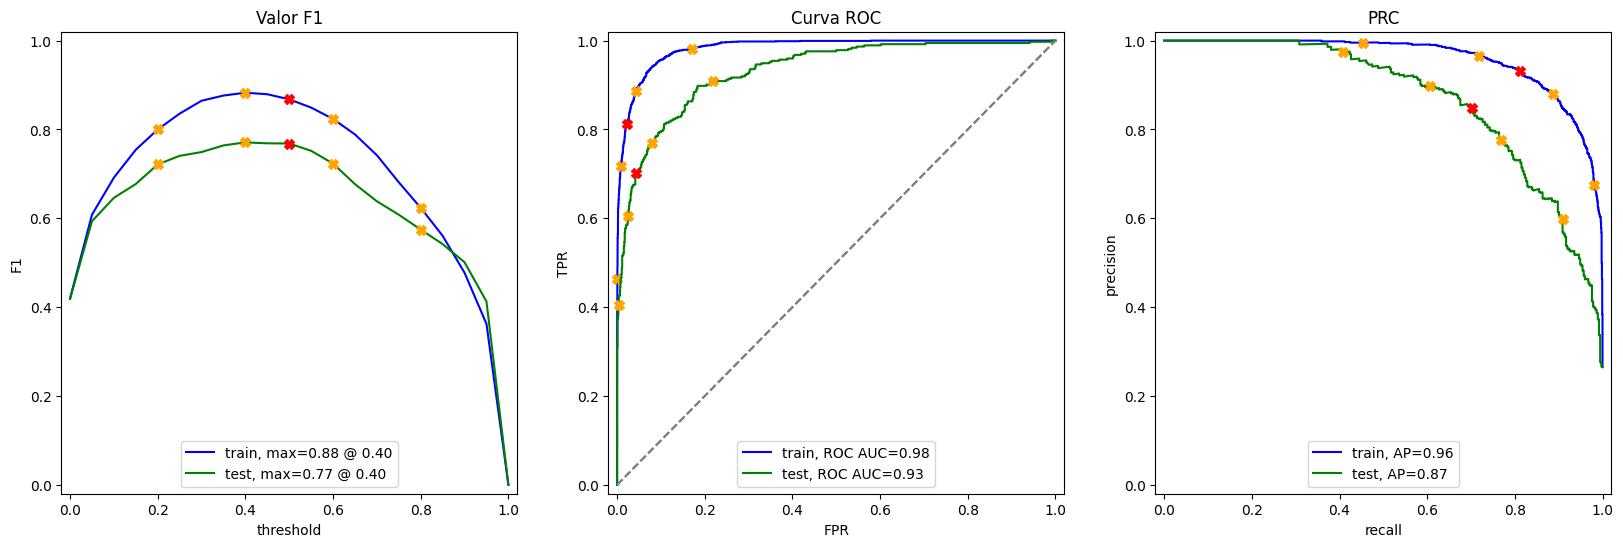

In [ ]:
evaluate_model(lgbm_model, X_train, y_train, X_test, y_test)